In [3]:
from commonfunctions import *
import cv2 as cv 


47


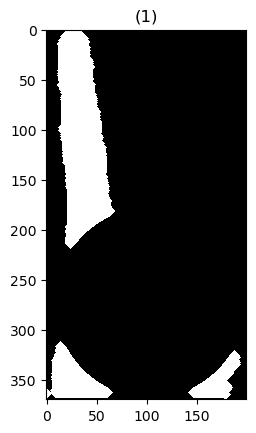

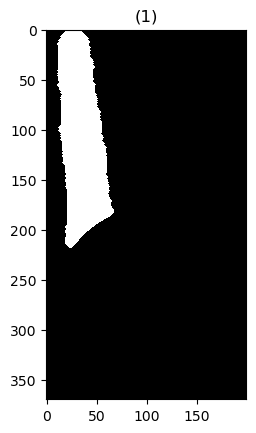

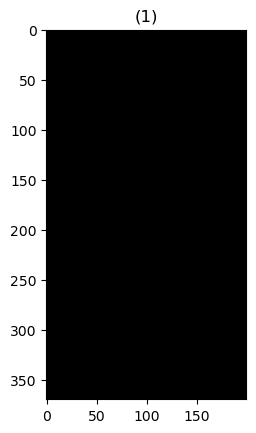

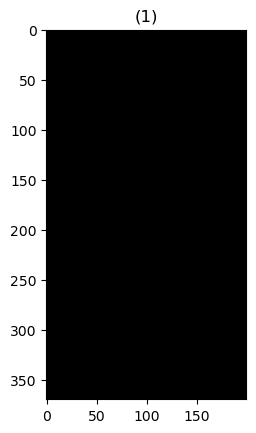

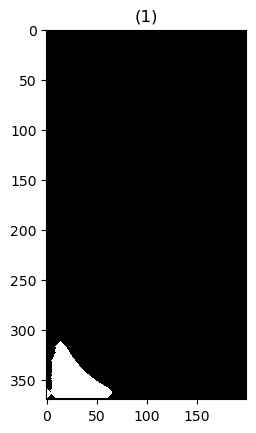

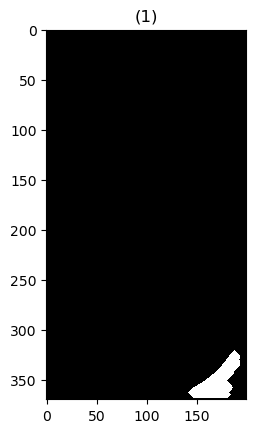

In [4]:
original = rgb2gray(io.imread('./imgs/hand6.jpg'))
def detectFingers(original):
    if original is None:
        return
    image = original>0.9
    numberOfIteration = (image.shape[0]+image.shape[1])//12
    print(numberOfIteration)
    kernel = np.ones((5,5), np.uint8)  
    for i in range(numberOfIteration):
        image = binary_erosion(image)  
    for i in range(numberOfIteration):
        image = binary_dilation(image)

    contours = find_contours(image)
    center = ()
    radius = 0
    for contour in contours:
        Ymin = int(np.min(contour[:, 1]))
        Ymax = int(np.max(contour[:, 1]))
        Xmin = int(np.min(contour[:, 0]))
        Xmax = int(np.max(contour[:, 0]))
        center = ((Xmin+Xmax)//2,(Ymin+Ymax)//2)
        radius = center[0] - Xmin

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if math.dist((i,j),center)<radius:
                original[i,j] = 0


    for i in range(5):
        original = binary_erosion(original)
    for i in range(5):
        original = binary_dilation(original)        
    show_images([original])

    fingersCotours = find_contours(original)
    for contour in fingersCotours:
        Ymin = int(np.min(contour[:, 1]))
        Ymax = int(np.max(contour[:, 1]))
        Xmin = int(np.min(contour[:, 0]))
        Xmax = int(np.max(contour[:, 0]))
        img = np.copy(original)
        for i in range (img.shape[0]):
            for j in range(img.shape[1]):
                if i > Xmin and i < Xmax and j > Ymin and j<Ymax:
                    img[i,j] = 0
        img = original.astype(int) - img.astype(int)
        show_images([img])

detectFingers(original)